# Python Programming in Parallel

The power of the Monte Carlo method is that we can sample our population multiple times, estimate our target and then look at the variance between those estimations. This will give us a clearer answer than just picking a number of darts and hoping that sample size is effective.

## Running Monte Carlo in a Loop

To do this in Python, we can use a loop to run these simulations multiple times and gather the results. We can take the code we wrote last week and add some steps to run these calculations multiple times. Here, we've moved the $\pi$ estimation to a function `estimate_pi` and added a loop in `__main__`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

    
def throw_darts(n):
    darts = 2*np.random.random((n,2)) - 1
    return darts

def in_unit_circle(p):
    return np.linalg.norm(p,axis=1)<1

def estimate_pi(n):
    d_arr = throw_darts(n)
    h_arr = in_unit_circle(d_arr)
    return 4 * np.sum(h_arr) / n

if __name__ == '__main__':
    n_ests = 5
    n = 10000
    N = n_ests*n
    
    start = time.time()
    
    for i in range(n_ests):
        pi_ests = []
        pi_ests.append(estimate_pi(n))
    
    
    
    pi_est_mean = np.mean(pi_ests)
    pi_est_std  = np.std(pi_ests)
    formstr = "pi_est_mean = {:2.10f}, pi_est_std = {:2.10f}, n = {:d}"
    print(formstr.format(pi_est_mean, pi_est_std, n))
    plt.hist(pi_ests)

Copy and paste the code above into spyder and save it as `montecarlo_loop.py`. Run it to see what kind of result you get. Is the estimation good? Does the histagram give you any inisght?


**Run it again, but change `n_ests` to 5000**


How does the distribution change? Does this appear to be a more reliable calculation than with five runs? 

Did it take a long time to run? How long is too long? With a larger calculation, you can see how long this might take to get a good result. This is why we use parallel computing and large systems like Stampede2 to run calculations.


How can we test whether more darts or more runs are more effective?

## Testing Runs vs. Darts

First we'll look at changing the number of darts and keeping the number of runs the same `n_ests=50`. 

We should look at the standard deviation of the results as well as the histogram to see the convergence of the values.

You can copy this code and paste it into a new file in Spyder, I called it `montepi-dartloop.py`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
    
def throw_darts(n):
    darts = 2*np.random.random((n,2)) - 1
    return darts

def in_unit_circle(p):
    return np.linalg.norm(p,axis=1)<1

def estimate_pi(n):
    d_arr = throw_darts(n)
    h_arr = in_unit_circle(d_arr)
    return 4 * np.sum(h_arr) / n

if __name__ == '__main__':
    n_ests = 50
    darts = 100
  #  N = n_ests*n
    
    
    
    while darts < 10000000:
        pi_ests = []
        start = time.time()
        for i in range(n_ests):
            
        
            pi_ests.append(estimate_pi(darts))
        t = time.time() - start
        print("Number of runs = {:d}, t = {:2.4f}".format(n_ests, t))
        plt.figure()
        plt.hist(pi_ests)
    
        pi_est_mean = np.mean(pi_ests)
        pi_est_std  = np.std(pi_ests)
        formstr = "pi_est_mean = {:2.10f}, pi_est_std = {:2.10f}, darts = {:d}"
        print(formstr.format(pi_est_mean, pi_est_std, darts))
        
        darts = darts*10

Here's the output from the code, including the time for each run. Look at the code and see if you understand how all the pieces work. How does the time change as you increase the number of darts? Does the standard deviation improve?

In [ ]:
Number of runs = 50, t = 0.0019
pi_est_mean = 3.1536000000, pi_est_std = 0.1640214620, darts = 100
Number of runs = 50, t = 0.0055
pi_est_mean = 3.1442400000, pi_est_std = 0.0506622384, darts = 1000
Number of runs = 50, t = 0.0231
pi_est_mean = 3.1444720000, pi_est_std = 0.0173927231, darts = 10000
Number of runs = 50, t = 0.2262
pi_est_mean = 3.1417144000, pi_est_std = 0.0042169563, darts = 100000
Number of runs = 50, t = 2.8439
pi_est_mean = 3.1414833600, pi_est_std = 0.0016668142, darts = 1000000

| Number of Darts | Result  |
|----------------|---------|
|  100            | <img src="images/100_darts.png" width="200"/> |
|  1,000          | <img src="images/1000_darts.png" width="200"/> |
|  10,000         | <img src="images/10000_darts.png" width="200"/> |
|  100,000        | <img src="images/100000_darts.png" width="200"/> |
|  1,000,000      | <img src="images/1000000_darts.png" width="200"/> |

You can see the effect of using a large number of darts on the variance of the results. All the histograms have the same x range, 3.0 to 3.3, to make the easy to compare.


The following program implements a loop that runs the simulation with the same number of darts `darts = 10000` and changes the number of runs from 50 to 50000. You can copy and paste this code into a new file in Spyder, I called it `montepi-loop.py`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
    
def throw_darts(n):
    darts = 2*np.random.random((n,2)) - 1
    return darts

def in_unit_circle(p):
    return np.linalg.norm(p,axis=1)<1

def estimate_pi(n):
    d_arr = throw_darts(n)
    h_arr = in_unit_circle(d_arr)
    return 4 * np.sum(h_arr) / n

if __name__ == '__main__':
    n_ests = 50
    darts = 10000
    
   
    while n_ests < 100000:
        pi_ests = []
        start = time.time()
        for i in range(n_ests):
            
        
            pi_ests.append(estimate_pi(darts))
        t = time.time() - start
        print("Number of runs = {:d}, t = {:2.4f}".format(n_ests, t))
        plt.figure()
        plt.xlim((3.1,3.2))
        plt.hist(pi_ests)
    
        pi_est_mean = np.mean(pi_ests)
        pi_est_std  = np.std(pi_ests)
        formstr = "pi_est_mean = {:2.10f}, pi_est_std = {:2.10f}, darts = {:d}"
        print(formstr.format(pi_est_mean, pi_est_std, darts))
        
        n_ests = int(n_ests*10)

Here is the output from this code, you can see the time increase as you go from 50 runs to 50,000. The histograms look very different from the previous code.

In [ ]:
Number of runs = 50, t = 0.0301
pi_est_mean = 3.1447520000, pi_est_std = 0.0144816883, darts = 10000
Number of runs = 500, t = 0.2138
pi_est_mean = 3.1417456000, pi_est_std = 0.0169036209, darts = 10000
Number of runs = 5000, t = 2.0944
pi_est_mean = 3.1413668000, pi_est_std = 0.0165346623, darts = 10000
Number of runs = 50000, t = 21.3021
pi_est_mean = 3.1416676240, pi_est_std = 0.0164531550, darts = 10000

| Number of Runs | Result  |
|----------------|---------|
|  50            | <img src="images/50_runs.png" width="200"/>|
|  500           | <img src="images/500_runs.png" width="200"/>|
|  5000          | <img src="images/5000_runs.png" width="200"/>|
|  50000         | <img src="images/50000_runs.png" width="200"/>|


## Why Parallel?



<img src="images/threads.png" width="600"/>

As the image above shows, if we can break up the tasks in our code to run on separate threads at the same time, we can potentially make the code run faster. This can be difficult to get to work and it isn't always better to run this way but for some jobs, we can significantly speed up our code and also expand onto large parallel systems, like supercomputers, to calculate very large systems.

This is why Monte Carlo calcuations are very popular in supercomputing scale applications, because it is fairly easy to scale them up and the individual processes are **independent** so they can run at the same time without dependencies.

<img src="images/montecarlo_slide.png" width="600"/>

### MPI4Py

The tool we will use for parallel processing is MPI4Py which is an implementation of MPI in Python. MPI stands for Message Passing Interface and is basically a way to get multiple processing units, in this case cores, to share the workload and communicate with each other. The processors are given "ranks". The rank 0 processor is the master processor and sends and receives information from each of the worker processors.

In [ ]:
comm = MPI.COMM_WORLD  # sets up communication between the processors
size = comm.Get_size() # gives number of ranks in comm
rank = comm.Get_rank() # identifies ranks of the processors, starting with 0
comm.scatter(data) # break up an array and send data out to all processors
comm.gather(data) # gather data from processors

<img src="images/MPI_scatter.png" width="600"/>

<img src="images/MPI_Gather.png" width="600"/>

Here's an example of scatter and gather in our code. On each of the available processes, it will calculate an estimate of pi by drawing N random numbers. The master processes will assemble all of the estimates produced by all workers, and compute the mean and standard deviation across the independent runs.

In [ ]:
def estimate_pi_in_parallel(comm, N):

    if rank == 0:
        data = [N for i in range(size)]
    else:
        data = None
    data = comm.scatter(data, root=0)
    #
    pi_est = estimate_pi(N)
    #
    pi_estimates = comm.gather(pi_est, root=0)
    if rank == 0:
        return pi_estimates

## Moving to the Supercomputer

<img src="images/mpi_montecarlo.png" width="600"/>

### Running our Monte Carlo estimation in parallel on Stampede2

Now, we will transfer the `pi_parallel.py` python file and the `job.sh` job script file to Stampede2. We want to run this job several times with different size core count requests to see how that affects how long the job takes. We will edit the job script to request different numbers of cores: 8, 16, 32, 64.

To run this program on Stampede2, we have to go through certain steps;

1. Log into Stampede2 
2. Get files from github repository
3. Update `job.sh` file and submit jobs to batch
4. Once a job completes, check output for successful completion
5. Transfer output back to your computer, using Globus

1. Log into Stampede2 
    - ssh to login.xsede.org then gsissh to Stampede2
    
    
2. Get files from github repository    
    - `git clone https://github.com/jeaimehp/directstem.git`
    - This will create a directory "directstem" and put the files we need there
    - `cd directstem`
  
  
3. Update `job.sh` batch script and submit jobs to batch
      - Edit (use either nano or vi) job.sh to modify the email address to yours

        #SBATCH --mail-user=youremail@xxxx.edu
        
    - Save file (vi :w   nano Ctrl+o)
    - Edit MPI tasks
    
        #SBATCH -n 64              # Total # of mpi tasks
        
    - If using vi, press i to allow editing and change 64 to 8, hit `esc`, then type `:w job8.sh`. This will save a new file. Repeat these steps for 16 and 32. When done type `:q!` to leave vi
    - If using nano, edit line above, change 64 to 8. Ctrl+o change filename to `job8.sh`. Repeat these steps for 16 and 32. When done type Ctrl+x to leave nano, answer no.
    Now you should have 4 job scripts: job.sh, job8.sh, job16.sh, job32.sh
    - `sbatch  job.sh ` #submit each job
        When you submit the job, you should see some statements checking that you have provided the correct information. The final statement should be "Submitted batch job XXXXXXX" That number is your jobid.
    - squeue -u \`whoami\`  #check job status
    
    - `ls -alt` # list the contents of your directory in time order so you can see the newest files on the top
    



4. Once job completes, check output
    - `cat myjob.o*` or `cat myjob.oJobID#` #displays the contents of the job output file, fill in with the job id


You should see a file like the one below. If you see any other messages or errors listed, then your job had a problem and didn't complete correctly. Please let the instructor know and we'll discuss it.

In [ ]:
cat myjob.o5568792


Currently Loaded Modules:
  1) intel/18.0.2      4) git/2.24.1       7) cmake/3.16.1
  2) libfabric/1.7.0   5) autotools/1.1    8) xalt/2.8
  3) impi/18.0.2       6) python2/2.7.15   9) TACC

 

/home1/04135/tg834346/ds-python
Mon Apr 20 16:15:36 CDT 2020
TACC:  Starting up job 5568792 
TACC:  Starting parallel tasks... 
MPI size = 64
1024 3.13482666015625 0.05217984714475068
4096 3.1430206298828125 0.023611648596208255
16384 3.1415481567382812 0.012168018465721247
65536 3.1425952911376953 0.006008509973199845
262144 3.141845464706421 0.0029074806908967335
1048576 3.1416112184524536 0.0016187660049334007
4194304 3.1415042132139206 0.0007705360257607911
16777216 3.141533490270376 0.00037337832673420073
67108864 3.1416473127901554 0.00019640405597756922
268435456 3.1415855595842004 9.315265178432316e-05
TACC:  Shutdown complete. Exiting. 

real	1m58.948s
user	84m36.034s
sys	39m11.914s

We can look at each of these output files to see how long the calculation took with different size core requests.

Use the `grep` command to view the number of cores and time of each job

`grep -E "MPI\real" myjob.o*`

| Number of Cores | Time   |
|----------------|---------|
| 8  |    12min 2.164sec    |
| 16 |    6min 6.808sec    |
| 32 |    3min 8.468sec    |
| 64 |    2min 0.648sec    |


Here is the "real" time data for one set of jobs with different core requests. You can see that generally the job gets significantly shorter as you increase the number of cores. The difference between 32 and 64 cores is not as large as you might expect. There is a limit to how parallel code can go, it isn't always effective to just add more cores. We might expect to see a drop off in speed if we ran this job with more than 64 cores.

In [ ]:
print(np.pi)
3.141592653589793

5. Transfer output back to your computer, using Globus
    - Once you get the results for the 64 core job, we are going to transfer that file (`pi_output_64.csv`) back to your laptop.
    - Use the Globus directions below to transfer the job output.

Transfer files to Stampede2
    - Go to globus.org and “Log In”
    - Go to “Your Collections” and choose your “Endpoint”
    - Select the “Panel” with two(2) columns
    - Add the Collection “XSEDE TACC Stampede 2”
    - Select the file(s) you want to transfer and click “Start”
    - Click “refresh list” to see the new files when completed


### Visualizing Output

The final activity is to visualize the statistics collected in the 64 node job. The code you can use to do this is below. Once, you've transferred the output from Stampede2 to your laptop, you can run this in Spyder. Make sure to change the path to the csv file or Spyder won't be able to find it.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

output = pd.read_csv("/path to your file/pi_output.csv", header=None)
estimates=np.array(output)
print(estimates)


plt.figure()
plt.errorbar(np.log2(estimates[:,0]), estimates[:,1], yerr=estimates[:,2])
plt.ylabel('estimate of pi')
plt.xlabel('log2(number of darts N)')
plt.savefig('pi_vs_log2_N.png')
plt.figure()
plt.ylabel('log2(standard deviation)')
plt.xlabel('log2(number of darts N)')
plt.plot(np.log2(estimates[:,0]), np.log2(estimates[:,2]))
plt.savefig('log2_std_vs_log2_N.png')


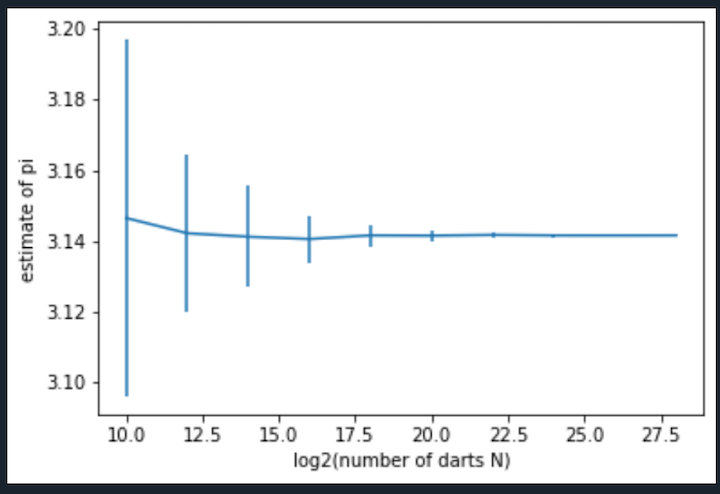

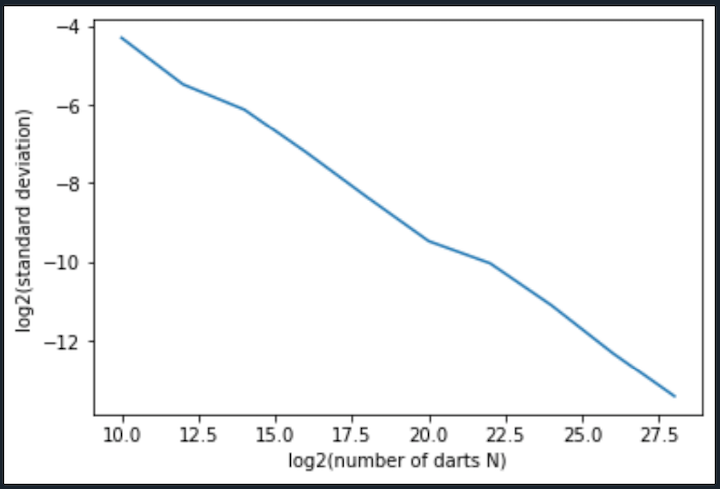

## References

Here are some references for these exercises

https://cvw.cac.cornell.edu/python/exercise

https://rabernat.github.io/research_computing/parallel-programming-with-mpi-for-python.html

https://cvw.cac.cornell.edu/MPI/





## Further Python Reading

Data Science: https://cvw.cac.cornell.edu/PyDataSci1/